### 문제정의
- 보스턴 주택 가격 데이터를 사용해서 주택 가격을 예측해보자
- 회귀모델
- LinearRegression, SGDRegressor

### 데이터 수집 

In [1]:
# from sklearn.datasets import load_boston
from sklearn import datasets
X, y = datasets.fetch_openml('boston', return_X_y=True)

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [3]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

#### 문제와 정답합치기 

In [4]:
import pandas as pd
# y = pd.DataFrame(y, columns = ['price'])
X['CHAS']= X['CHAS'].astype(int)
X['RAD']= X['RAD'].astype(int)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int32  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int32  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(11), int32(2)
memory usage: 47.6 KB


In [6]:
total = pd.concat([X,y], axis= 1) # 열방향
total

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


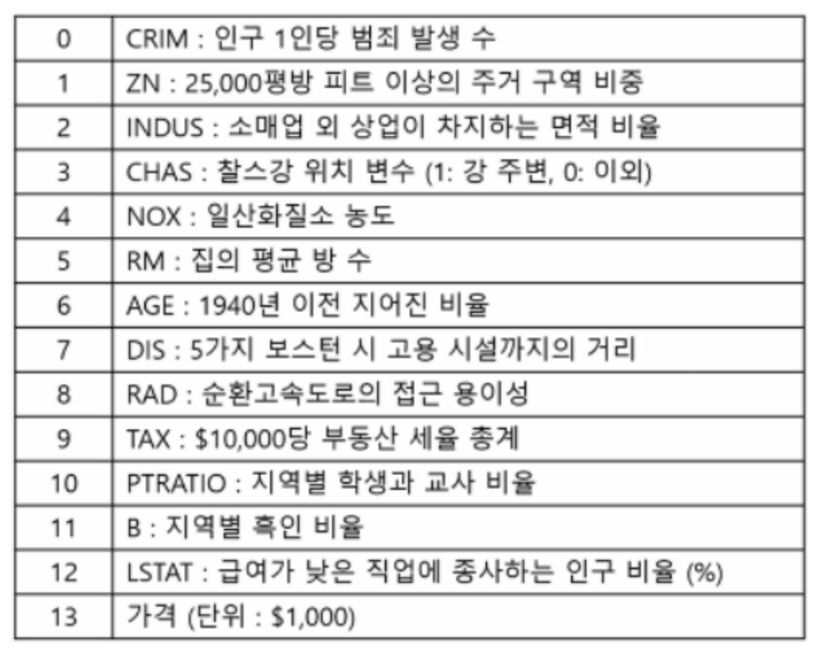

### 데이터 전처리

#### 특성 확장 
- 특성(문제)들끼리 곱해서 새로운 특성을 만들자 


In [7]:
col = X.columns # X가 가지고 있는 컬럼들 
col 

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

#### 데이터 스케일링
- 주의사항 : 데이터 전처리 마지막에 사용(결측치가 없어야 함, 이상치 있어도 됨)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
standard = StandardScaler()

In [10]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [11]:
standard.fit(X)

StandardScaler()

In [12]:
# Standardscaler 기준으로 변환 
X_trans = standard.transform(X)


In [13]:
col.size

13

In [14]:
for i in range(col.size) : # 전체 컬럼을 순서대로 꺼내오는 for문 
    for j in range(i, col.size) : # 어떤 컬럼을 곱할지 정하는 for문
        # i * j = i * j 
        X[col[i]+ '*' + col[j]] = X[col[i]] * X[col[j]]

In [15]:
X.shape

(506, 104)

### 탐색적 데이터 분석 

#### 상관관계 분석 
- 피어슨 상관계수 : 두 컬럼의 선형도 판단

In [16]:
total.select_dtypes(include=['int64', 'float64']).corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996,0.249929
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044,-0.507787
B,-0.385064,0.175520,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.441808,-0.177383,1.000000,-0.366087,0.333461


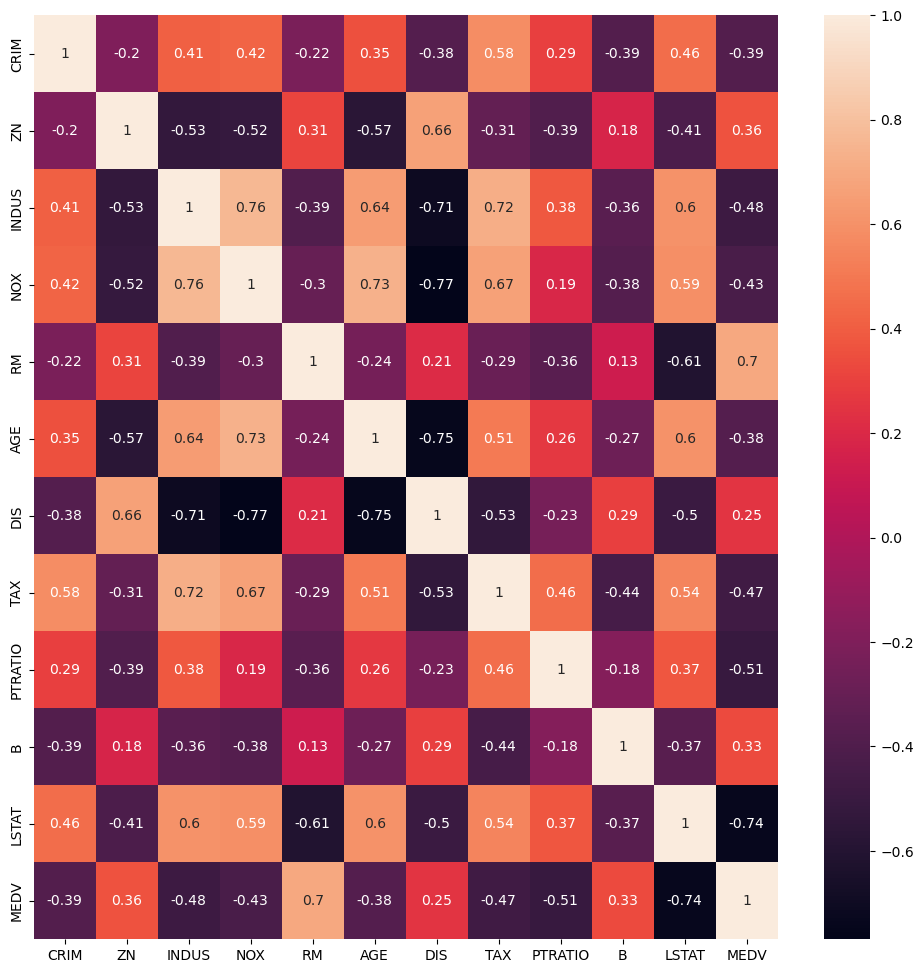

In [17]:
# 관계를 시각적으로 확인하기 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(total.select_dtypes(include=['int64', 'float64']).corr(), annot=True)
# annot =True : 수치값 표현
plt.show()

#heatmap() : 시각적으로 뚜렷하 차이를 확인
#활용방법 : 1.데이터를 전처리할 때 우선 순위의 판단 근거가 된다. ==> 모델이 학습하는 데 시간이 많이 걸릴 때 시간을 줄이는 근거가 된다.
#           2. 데이터를 줄일 때 - 가지고 있는 컬럼들중에서 상관도가 낮은 것부터 삭제한다.
#                                  추가적으로 전처리를 하는 데 시간이 부족할 경우 - 상관도가 높은 것부터 차례로 전처리를 해줌.

# 0 ~ 0.3 : 관계가 미미함.
# 0.3 ~ 0.7 : 적당히 관계가 있다. 
# 0.7 ~ 1: 아주 관계가 높다.

- 비율이 높을 수록 집값의 영향을 제공한다. (Rm)
- 비율이 낮을 수록 집값의 영향을 제공하지 않는다.(Lstat)

### 모델 선택 및 하이퍼파라미터 튜닝

In [18]:
#1. 수학적 공식을 적용한 해석적인 모델 
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

#2. 경사하강법
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor(eta0 =0.0000001)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#### 규제를 적용시킨 모델

In [20]:
from sklearn.linear_model import Lasso, Ridge

#### 훈련과 평가데이터로 분리

In [21]:
# total의 컬럼을 x,y로 분리
from sklearn.model_selection import train_test_split
# Scaler 적용
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, random_state=10)

### 학습

In [22]:
lr_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)

SGDRegressor(eta0=1e-07)

### 예측(선형의 경우 평가가 아닌 예측)

In [23]:
lr_model.score(X_train, y_train)
# score : 회귀에서는 정확도가 아닌 모델의 성능 --> R2 score

# 74.95 ==> 93.27

0.7495400632086622

In [24]:
lr_model.score(X_test, y_test)
# 69.96 ==> 87.37

0.6996255772983111

In [25]:
sgd_model.score(X_train, y_train) # 학습율 eta0 = 0.01 기본값으로 발산 

-6.188553136264397

In [26]:
sgd_model.score(X_test, y_test)

-5.797672622560739

- 선형모델에서의 평가지표
    - 정량적인 수치 지표가 중요함.
    - MSE : 0 ~ 무한대, 오차의 판단기준이 모호
    - R2 score : 분산을 기반으로 성능을 예측. -1 ~ 1
        - -1 : 모델을 잘 설명하지 못하는 경우 
        - 1 : 모델을 잘 설명, 모델이 괜찮음.
        - 최고점수는 1, 음수가 나올 수도 있음.
        - 정확도가 아닌 ~%의 확률이라는 설명력을 가지고 있음.
        - 유의미한 경계 : 공학적으로 0.7 (70%)의 확률이면 괜찮다고 함. 사회과학 파트에서는 0.3(30%)면 괜찮다고 함.

#### Ridge 활용하기

In [27]:
# Ridge의 하이퍼 파라미터 튜닝
def ridge_alpha(alpha) : 
    ridge = Ridge(alpha= alpha) # alpha 기본값 : 1.0, -무한대 ~ +무한대
                                # 일반적으로 사용하는 구간 : 0.001 ~ 1000
    ridge.fit(X_train, y_train) # 학습
    print('train_score :', ridge.score(X_train, y_train)) # 결과를 함께 확인
    print('test_score :', ridge.score(X_test, y_test)) # 

In [28]:
ridge_alpha(0.0001)
# alph 값을 변경해가면서 값 확인
# test_Score가 가장 높은 순간 확인 

# alpha 기본값 = 1
# alpha 값이 증가 = 규제를 늘리겠다 ---> 모델이 복잡해지는 걸 막겠다. (과대적합일때 사용)
# alpha 값이 감소 = 규제를 줄이겠다  --> 모델이 단순해지는 걸 막겠다. (과소적합일 때 사용)

train_score : 0.7495400632083893
test_score : 0.6996256003386081


 - Ridge 정리
     - 규제를 줄이니 test_score가 상승
     - 과대적합보다는 과소적합 or 일반화에 가까운 상황
     - 전체 데이터가 골고루 중요할 때 사용

#### Lasso 활용하기 

In [29]:
import numpy as np

In [30]:
# Ridge의 하이퍼 파라미터 튜닝
def lasso_alpha(alpha) : 
    lasso = Lasso(alpha= alpha) # alpha 기본값 : 1.0, -무한대 ~ +무한대
                                # 일반적으로 사용하는 구간 : 0.001 ~ 1000
    lasso.fit(X_train, y_train) # 학습
    print('train_score :', lasso.score(X_train, y_train)) # 결과를 함께 확인
    print('test_score :', lasso.score(X_test, y_test)) # 
    
    # 사용한 특성의 수 확인하기
    print('사용한 특성 수 : ', np.sum(lasso.coef_ != 0)) #넘파이 라이브러리 필요  내가 규제한 lasso 데이터 파일 중 0이 아닌 값들의 총합 출력

In [31]:
# np.sum(lasso.coef_ != 0) 괄호 안의 값을 전부다 더해줌
# np.sum(값) ==> 값을 전부다 더해주는 함수
#lasso.coef_ = lasso가 학습한 후 전체 데이터 특성들의 가중치값을 출력 
#lasso.coef_ = 0 ==> 사용되지 않은 값(가중치), False
#lasso.coef_ = 1 ==> 사용된 값(가중치), True

# lasso.coef_ ! =0
# np.sum([True,False, True,False,True]) ===> True의 개수를 세어서 사용된 특성의 수로 반환

In [32]:
lasso_alpha(0.001)

# 구제를 늘릴수록 값(test_score)이 잘 나왔음
# 규제를 줄일수록 값(test_score)가 잘 나옴
# 규제값을 변경하면서 사용한 특성의 수도 확인

train_score : 0.7495394004093834
test_score : 0.6996932011080857
사용한 특성 수 :  13


- Lasso 정리
    - 규제를 적용할수록 test_score 값이 낮아짐, 특성의 수도 감소
    - 특정 데이터가 중요할 때 사용